# Assignment 3 - Personalized Spam Detector
## Prepared by: Achchala Deepan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from IPython.display import display

In [4]:
data = pd.read_csv("SPAM16 - Copy.csv")

data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   spam        4601 non-null   int64  
 1   internet    4601 non-null   float64
 2   order       4601 non-null   float64
 3   mail        4601 non-null   float64
 4   report      4601 non-null   float64
 5   free        4601 non-null   float64
 6   business    4601 non-null   float64
 7   email       4601 non-null   float64
 8   you         4601 non-null   float64
 9   money       4601 non-null   float64
 10  george      4601 non-null   float64
 11  meeting     4601 non-null   float64
 12  re          4601 non-null   float64
 13  conference  4601 non-null   float64
 14  ch$         4601 non-null   float64
 15  crl.long    4601 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 575.2 KB


In [5]:
# splitting the data using a seed of the last 4 digits of my student number (3939)
np.random.seed(3939)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=3939)

# display the new training and testing set sizes
train_size = train_data.shape[0]
test_size = test_data.shape[0]

train_size, test_size

(3220, 1381)

## Part 1: Descriptive Analysis - Use the training set only in this part

In [6]:
display(train_data.describe())

,spam,internet,order,mail,report,free,business,email,you,money,george,meeting,re,conference,ch$,crl.long
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.00000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.395342,0.111096,0.092857,0.240615,0.061233,0.250003,0.143506,0.192168,1.653255,0.09796,0.774606,0.120975,0.308121,0.034124,0.072125,50.772671
std,0.489000,0.428159,0.288396,0.678910,0.314829,0.884314,0.447605,0.547418,1.799155,0.47056,3.376460,0.669639,1.056123,0.275173,0.217792,132.221499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.290000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,1.000000,0.000000,0.000000,0.150000,0.000000,0.100000,0.000000,0.000000,2.602500,0.00000,0.000000,0.000000,0.120000,0.000000,0.050000,44.000000
max,1.000000,11.110000,5.260000,18.180000,5.550000,20.000000,7.140000,9.090000,18.750000,12.50000,33.330000,14.280000,21.420000,8.330000,6.003000,2204.000000


In [7]:
general_stats = train_data.describe()
general_stats

,spam,internet,order,mail,report,free,business,email,you,money,george,meeting,re,conference,ch$,crl.long
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.00000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.395342,0.111096,0.092857,0.240615,0.061233,0.250003,0.143506,0.192168,1.653255,0.09796,0.774606,0.120975,0.308121,0.034124,0.072125,50.772671
std,0.489000,0.428159,0.288396,0.678910,0.314829,0.884314,0.447605,0.547418,1.799155,0.47056,3.376460,0.669639,1.056123,0.275173,0.217792,132.221499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.290000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,1.000000,0.000000,0.000000,0.150000,0.000000,0.100000,0.000000,0.000000,2.602500,0.00000,0.000000,0.000000,0.120000,0.000000,0.050000,44.000000
max,1.000000,11.110000,5.260000,18.180000,5.550000,20.000000,7.140000,9.090000,18.750000,12.50000,33.330000,14.280000,21.420000,8.330000,6.003000,2204.000000


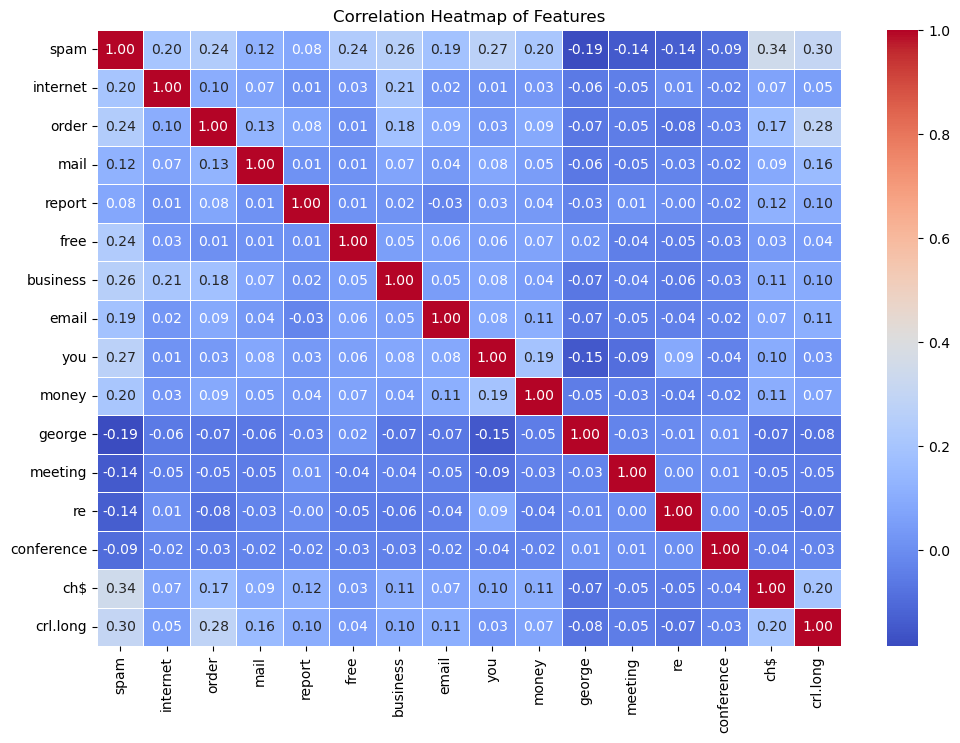

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

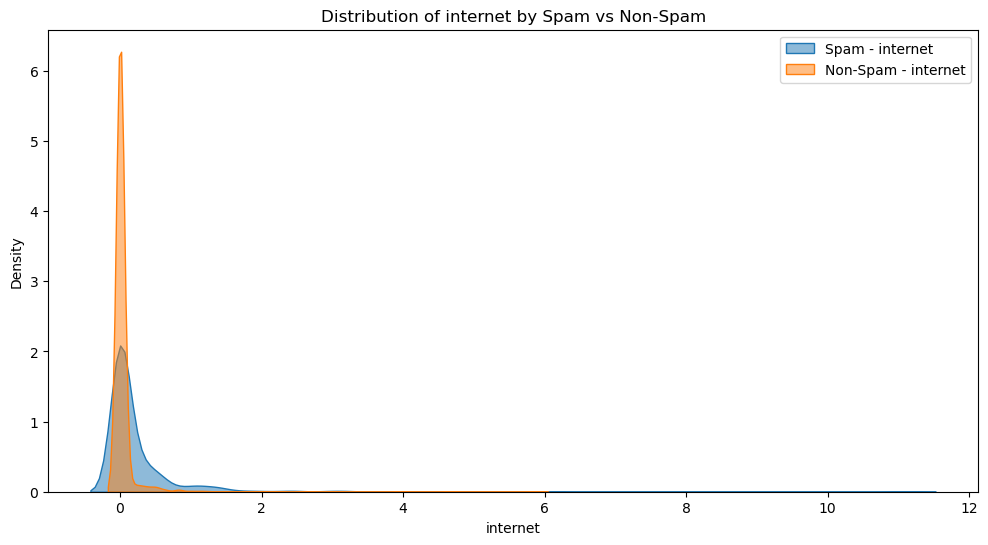

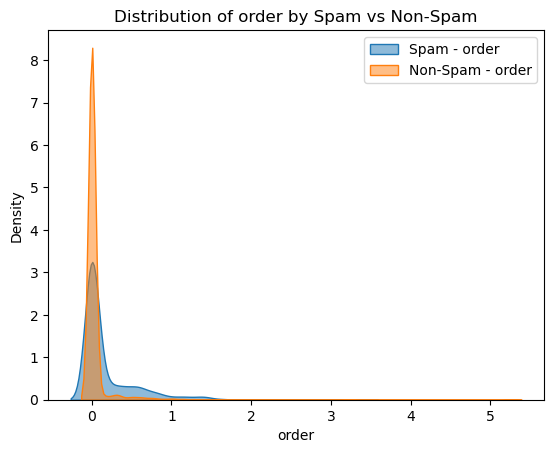

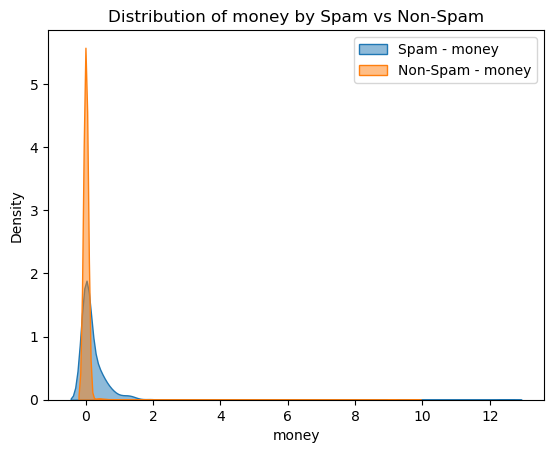

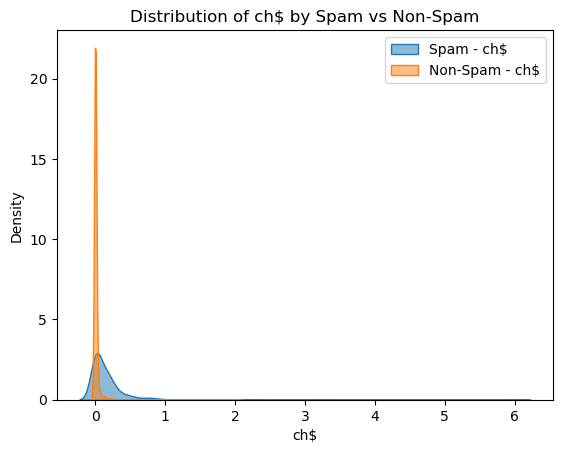

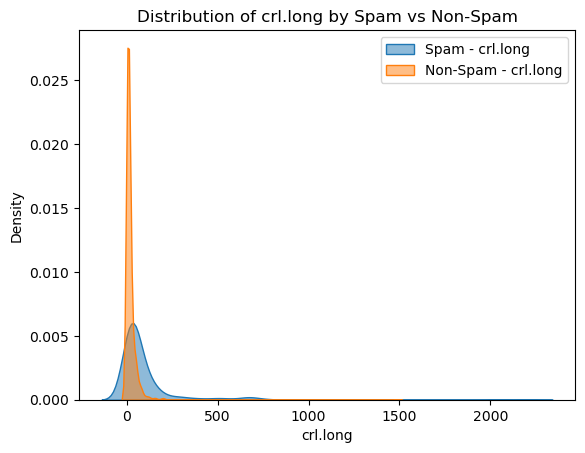

In [9]:
plt.figure(figsize=(12, 6))
selected_features = ['internet', 'order', 'money', 'ch$', 'crl.long']
for feature in selected_features:
    sns.kdeplot(train_data[train_data['spam'] == 1][feature], label=f'Spam - {feature}', fill=True, alpha=0.5)
    sns.kdeplot(train_data[train_data['spam'] == 0][feature], label=f'Non-Spam - {feature}', fill=True, alpha=0.5)
    plt.title(f'Distribution of {feature} by Spam vs Non-Spam')
    plt.legend()
    plt.show()

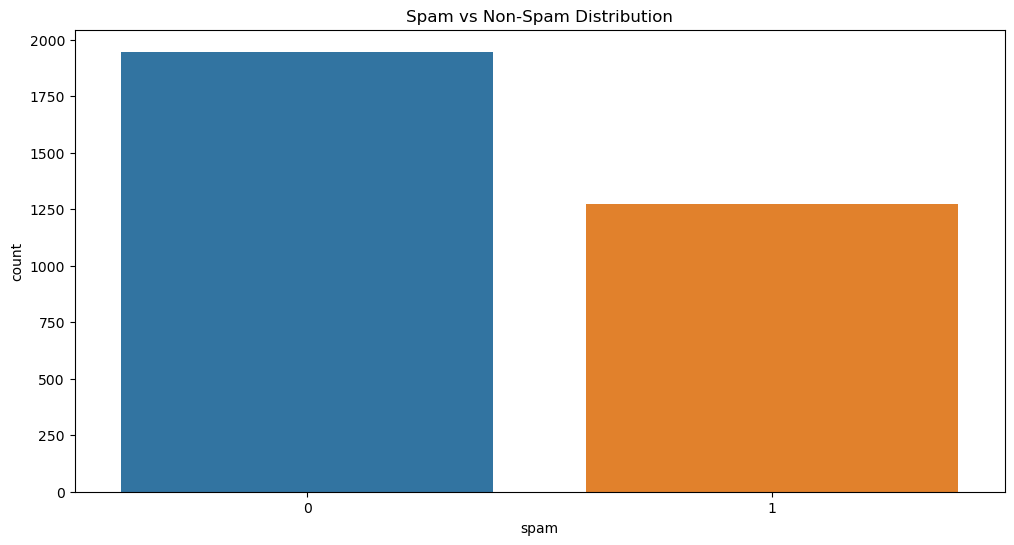

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='spam', data=train_data)
plt.title('Spam vs Non-Spam Distribution')
plt.show()

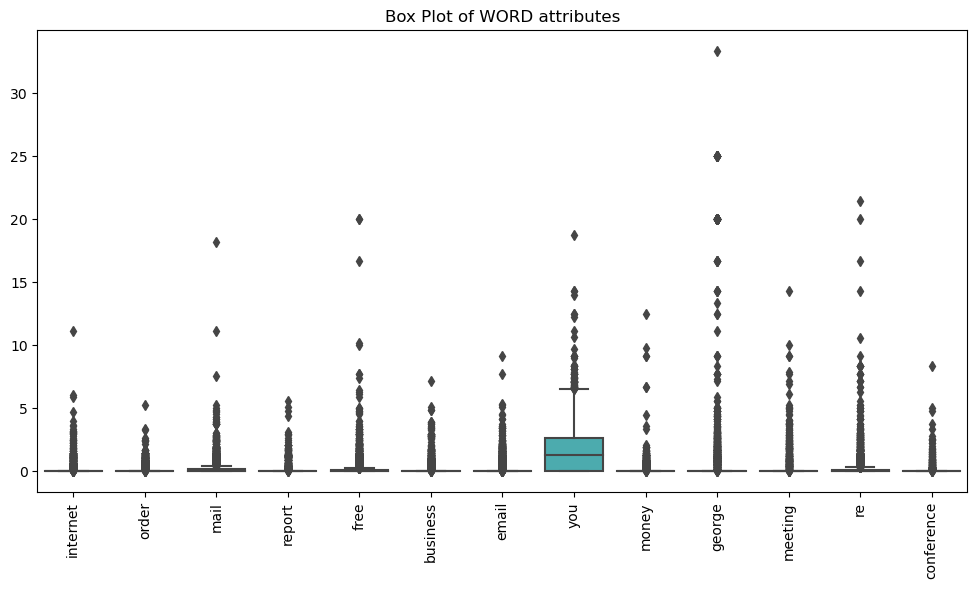

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data.iloc[:, 1:14])
plt.xticks(rotation=90)
plt.title('Box Plot of WORD attributes')
plt.show()

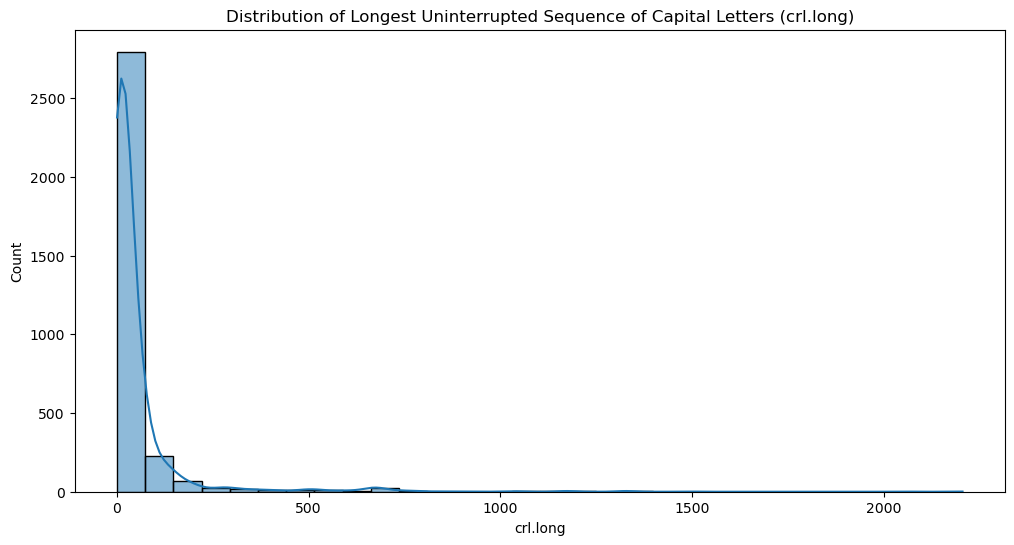

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data['crl.long'], bins=30, kde=True)
plt.title('Distribution of Longest Uninterrupted Sequence of Capital Letters (crl.long)')
plt.show()

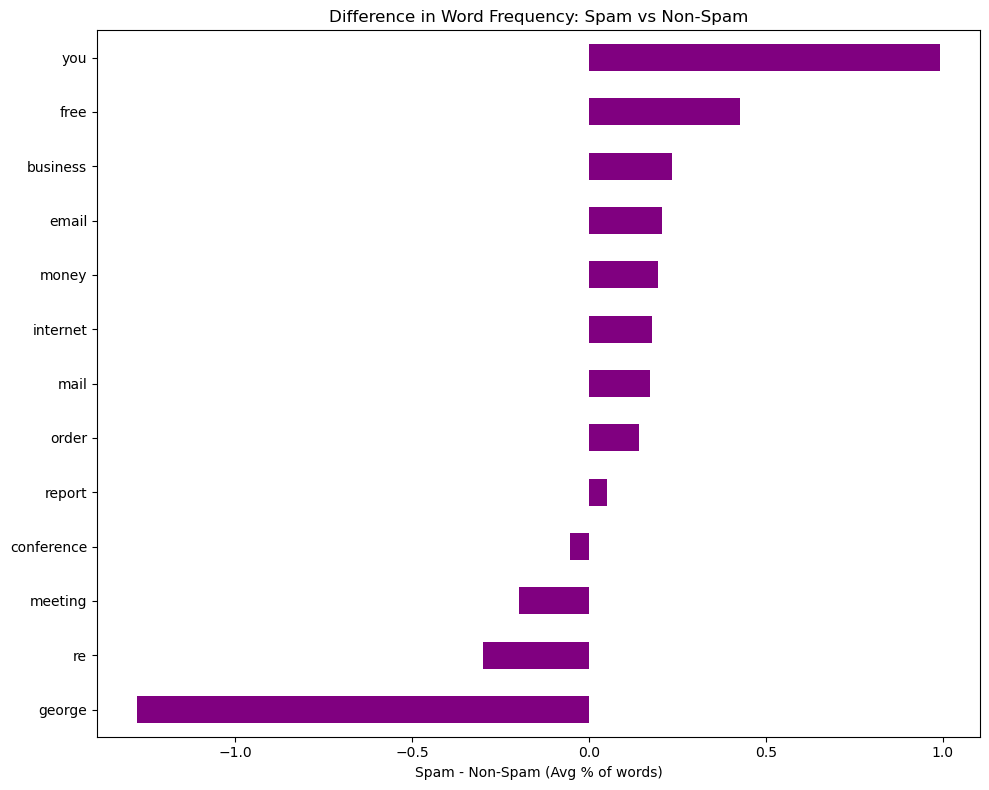

In [28]:
spam_avg = train_data[train_data['spam'] == 1].mean()
nonspam_avg = train_data[train_data['spam'] == 0].mean()

word_cols = train_data.columns[1:-2]  # exclude 'spam', 'ch$', and 'crl.long'
diff = spam_avg[word_cols] - nonspam_avg[word_cols]

diff.sort_values().plot(kind='barh', figsize=(10, 8), color='purple')
plt.title("Difference in Word Frequency: Spam vs Non-Spam")
plt.xlabel("Spam - Non-Spam (Avg % of words)")
plt.tight_layout()
plt.show()


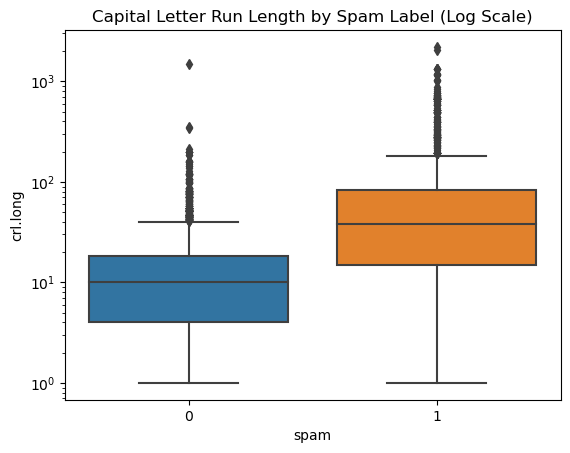

In [29]:
sns.boxplot(x='spam', y='crl.long', data=train_data)
plt.yscale("log")  # skewed distribution
plt.title("Capital Letter Run Length by Spam Label (Log Scale)")
plt.show()

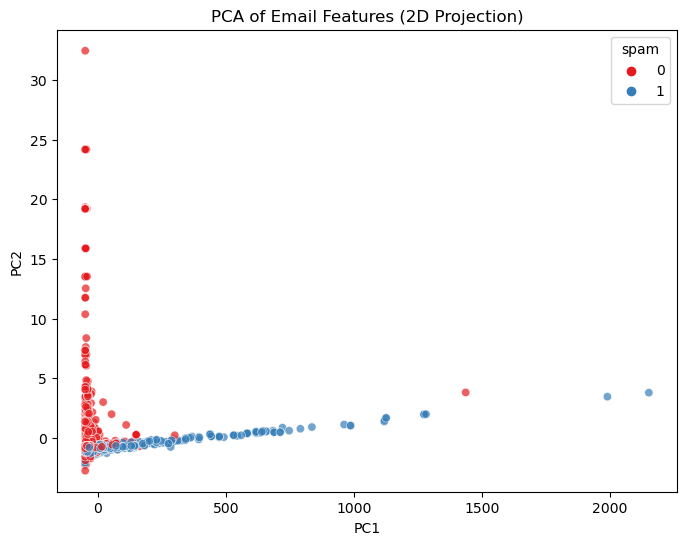

In [30]:
from sklearn.decomposition import PCA

X = train_data.drop(columns='spam')
y = train_data['spam']

pca = PCA(n_components=2)
components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=components, columns=["PC1", "PC2"])
pca_df["spam"] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="spam", palette="Set1", alpha=0.7)
plt.title("PCA of Email Features (2D Projection)")
plt.show()


## Part 2: Predictive Analysis

In [16]:
X_train = train_data.drop('spam', axis=1)
y_train = train_data['spam']
X_test = test_data.drop('spam', axis=1)
y_test = test_data['spam']

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
coefficients
significant_vars = coefficients[coefficients['Coefficient'].abs() > 0.1]  # threshold for significance
significant_vars

,Feature,Coefficient
0,internet,0.829648
1,order,0.539615
3,report,0.335774
4,free,1.477029
5,business,1.002293
6,email,0.326693
7,you,0.274980
8,money,0.911359
9,george,-4.562758
10,meeting,-2.361224


Consider Email number 50 in your training data set. According to your model, what is the probability that this email is a spam?

In [19]:
email_50_features = X_train.iloc[49]  # because index 49 for email number 50
email_50_prob = model.predict_proba([email_50_features])[0][1]
email_50_prob

/Users/achchala/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.1379656324550101

Compute the model`s predicted probabilities for emails in the testing set

In [20]:
y_test_probs = model.predict_proba(X_test)[:, 1]
y_test_probs

array([0.1725443 , 0.75733535, 0.99731946, ..., 0.17242149, 0.27381776,
       1.        ])

In [21]:
# confusion matrix with threshold 0.5
y_test_pred = (y_test_probs >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix

array([[785,  56],
       [113, 427]])

In [22]:
# False Positive Rate, False Negative Rate, Overall Accuracy
fp_rate = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1])
fn_rate = conf_matrix[1][0] / (conf_matrix[1][0] + conf_matrix[1][1])
accuracy = accuracy_score(y_test, y_test_pred)
print(f"False Positive Rate: {fp_rate:.4f}, False Negative Rate: {fn_rate:.4f}, Overall Accuracy: {accuracy:.4f}")

False Positive Rate: 0.0666, False Negative Rate: 0.2093, Overall Accuracy: 0.8776


In [23]:
# Baseline model comparison (all non-spam)
baseline_pred = np.zeros_like(y_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}, Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.6090, Model Accuracy: 0.8776


In [24]:
# Compute AUC
auc = roc_auc_score(y_test, y_test_probs)
auc

0.9466871449332805

In [25]:
results = {
    "Significant Variables": significant_vars,
    "Probability of Email 50 being spam": email_50_prob,
    "Confusion Matrix": conf_matrix,
    "False Positive Rate": fp_rate,
    "False Negative Rate": fn_rate,
    "Overall Accuracy": accuracy,
    "Baseline Model Accuracy": baseline_accuracy,
    "AUC": auc
}

results

{'Significant Variables':        Feature  Coefficient
 0     internet     0.829648
 1        order     0.539615
 3       report     0.335774
 4         free     1.477029
 5     business     1.002293
 6        email     0.326693
 7          you     0.274980
 8        money     0.911359
 9       george    -4.562758
 10     meeting    -2.361224
 11          re    -0.720110
 12  conference    -2.197294
 13         ch$     5.810111,
 'Probability of Email 50 being spam': 0.1379656324550101,
 'Confusion Matrix': array([[785,  56],
        [113, 427]]),
 'False Positive Rate': 0.06658739595719382,
 'False Negative Rate': 0.20925925925925926,
 'Overall Accuracy': 0.8776249094858798,
 'Baseline Model Accuracy': 0.6089790007241129,
 'AUC': 0.9466871449332805}